# Importing the necessary stuff :

In [5]:
import os
from os import walk
import numpy as np
import aplpy
import csv

import astropy.units as u

import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import astLib.astImages
import astLib.astPlots


from matplotlib.gridspec import GridSpec
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable
from astLib import astCoords 
from astLib import *
from astLib.astWCS import WCS

from astropy import units
from astropy.io import fits
# from astropy.wcs import WCS

from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5

from wcsaxes import datasets
#from spectral_cube import SpectralCube

%matplotlib inline


/home/theonarh/.local/lib/python2.7/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


## Fits files and data extraction :

In [5]:
# LOFAR
filename_lofar      = 'P7-mosaic_5x5.fits'
#cube_lofar          = SpectralCube.read(filename_lofar)
cube_lofar = fits.open('%s' %filename_lofar)
#cube_lofar[0,:,:].quicklook()

hdu_lofar           = fits.open(filename_lofar)[0]
data_lofar          = hdu_lofar.data[0,0,:,:]
levels_lofar        = np.arange(0.001, 0.030, 0.002)

# NVSS
filename_nvss       = 'NVSS_51_606000_5_3.fits'
#cube_nvss           = SpectralCube.read(filename_nvss)
cube_nvss  = fits.open('%s' %filename_nvss)
hdu_nvss            = fits.open(filename_nvss)[0]
data_nvss           = hdu_nvss.data[0,0,:,:]
levels_nvss         = np.arange(0.001, 0.015, 0.001)

wcs_lofar = WCS(filename_lofar)
wcs_nvss  = WCS(filename_nvss)

(88, 88)
(100, 100)


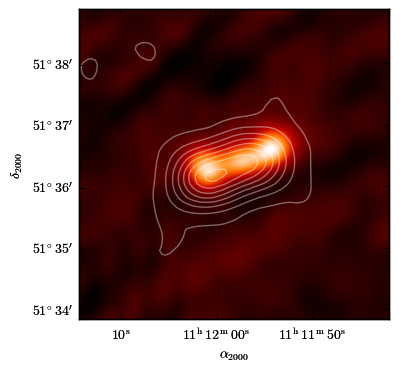

In [31]:
filename_nvss = 'NVSS_51_606000_5_3.fits'
filename_lofar = 'P7-mosaic_5x5.fits'
#
cube_nvss  = fits.open('%s' %filename_nvss)[0]
data_nvss  = cube_nvss.data[0,0,:,:]
#hd_nvss = fits.getheader('%s' %filename_nvss)
#
cube_lofar  = fits.open('%s' %filename_lofar)
hdu_lofar   = fits.open(filename_lofar)[0]
data_lofar  = hdu_lofar.data[0,0,:,:]
hd_nvss = fits.getheader('%s' %filename_lofar)
print data_lofar.shape
print data_nvss.shape
# ++++++++++ interpolating to have same size ++++++++
from scipy import interpolate
#
dshape = data_nvss.shape
# define new size
outKSize_x = data_lofar.shape[0]
outKSize_y = data_lofar.shape[-1]
# Rescale Data Size
x_old = np.linspace(-dshape[0]/2., dshape[0]/2., dshape[0])      
y_old = np.linspace(-dshape[-1]/2., dshape[-1]/2., dshape[-1])
xnew = np.linspace(x_old.min(), x_old.max(), outKSize_x)
ynew =  np.linspace(y_old.min(), y_old.max(), outKSize_y)
# Perform Interpolation
interp_Fxn = interpolate.RectBivariateSpline(np.sort(x_old),
                             np.sort(y_old),data_nvss, kx=3,ky=3)           
data_nvss_scaled = interp_Fxn(xnew,ynew)
import pywcsgrid2
ax = pywcsgrid2.subplot(111, header=hd_nvss)
im = plt.imshow(data_lofar, cmap=plt.cm.gist_heat, origin='lower')
levels_lofar        = np.arange(0.001, 0.030, 0.002)
plt.contour(data_nvss_scaled, levels=levels_lofar, colors='white', alpha=0.4)
#ax.locator_params(axis="y", nbins=7)

In [11]:
# LOFAR
filename_lofar      = 'P7-mosaic_5x5.fits'
cube_lofar          = SpectralCube.read(filename_lofar)
#cube_lofar[0,:,:].quicklook()

hdu_lofar           = fits.open(filename_lofar)[0]
data_lofar          = hdu_lofar.data[0,0,:,:]
levels_lofar        = np.arange(0.001, 0.030, 0.002)

# NVSS
filename_nvss       = 'NVSS_51_606000_5_3.fits'
cube_nvss           = SpectralCube.read(filename_nvss)

hdu_nvss            = fits.open(filename_nvss)[0]
data_nvss           = hdu_nvss.data[0,0,:,:]
levels_nvss         = np.arange(0.001, 0.015, 0.001)

wcs_lofar = WCS(filename_lofar)
wcs_nvss  = WCS(filename_nvss)

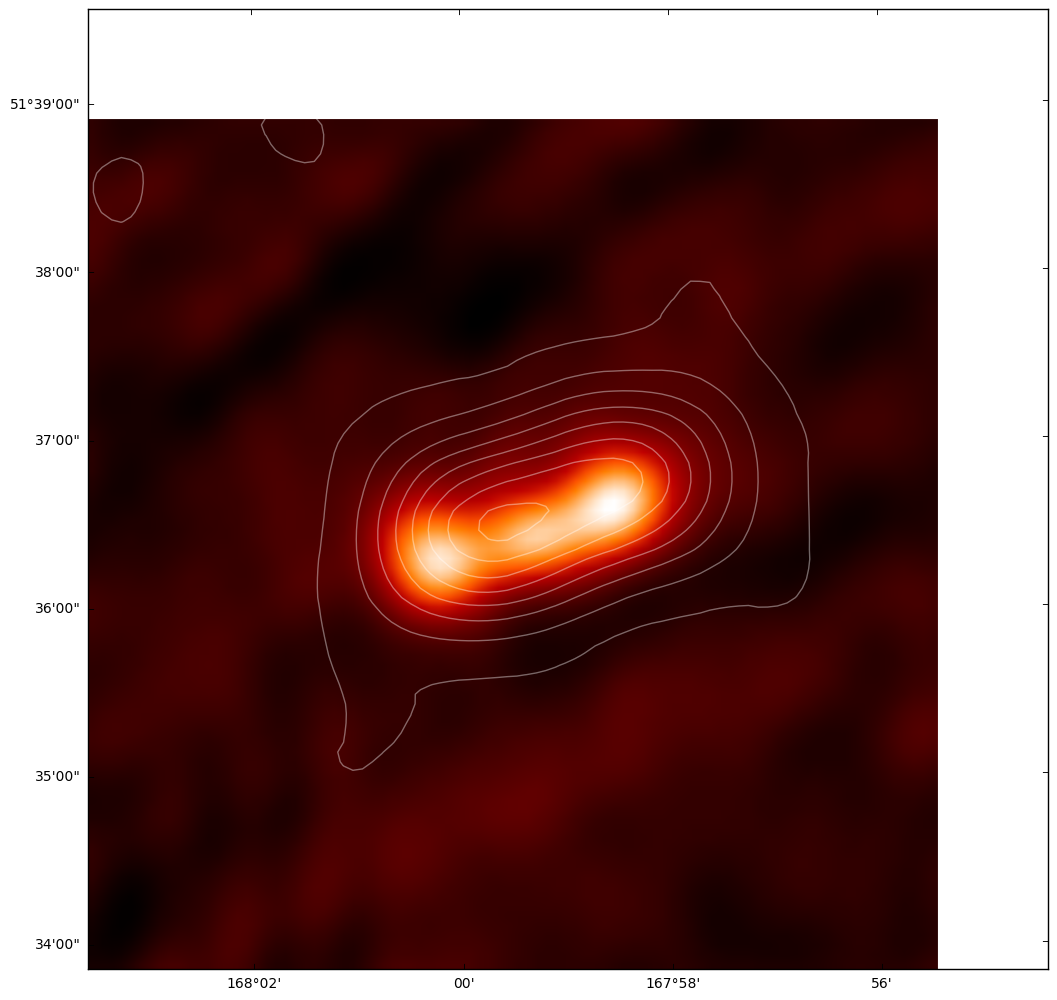

In [12]:
fig = plt.figure(figsize=(12, 12))

ax = fig.add_axes([0.15, 0.1, 0.8, 0.8], projection=cube_lofar[0,:,:].wcs)

extent = ax.get_xlim() + ax.get_ylim()

ax.imshow(data_lofar, cmap=plt.cm.gist_heat, origin='lower')#, extent=[0.0, 1.0, 0.0, 1.0])
ax.contour(data_nvss, levels=levels_lofar, colors='white', alpha=0.4)



INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -7.544e-03 [aplpy.core]
INFO: Auto-setting vmax to  3.280e-02 [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


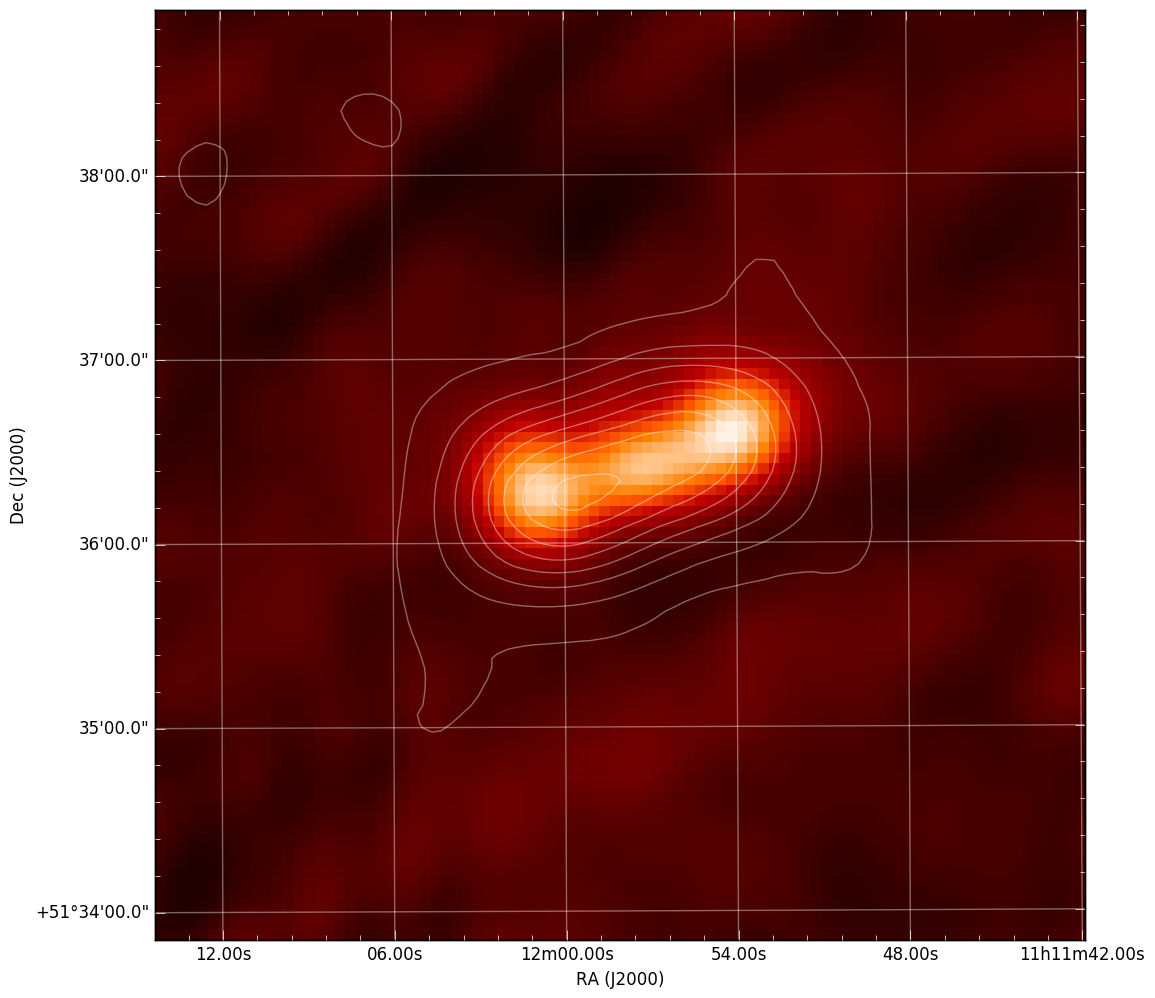

In [13]:
fig = plt.figure(figsize=(12, 12))

f_lofar = aplpy.FITSFigure(filename_lofar, figure=fig, subplot=(1, 1, 1));
f_lofar.set_tick_labels_font(size='large');
f_lofar.set_axis_labels_font(size='large');

f_lofar.show_colorscale(cmap='gist_heat', aspect='auto');


f_lofar.add_grid()

f_lofar.grid.set_alpha('0.4')

f_lofar.show_contour(filename_nvss, levels=levels_lofar, colors='white', alpha=0.4) #, colors=['red','green','blue','white','black'])

fig.canvas.draw()

TypeError: generateContourOverlay() takes at least 5 arguments (5 given)

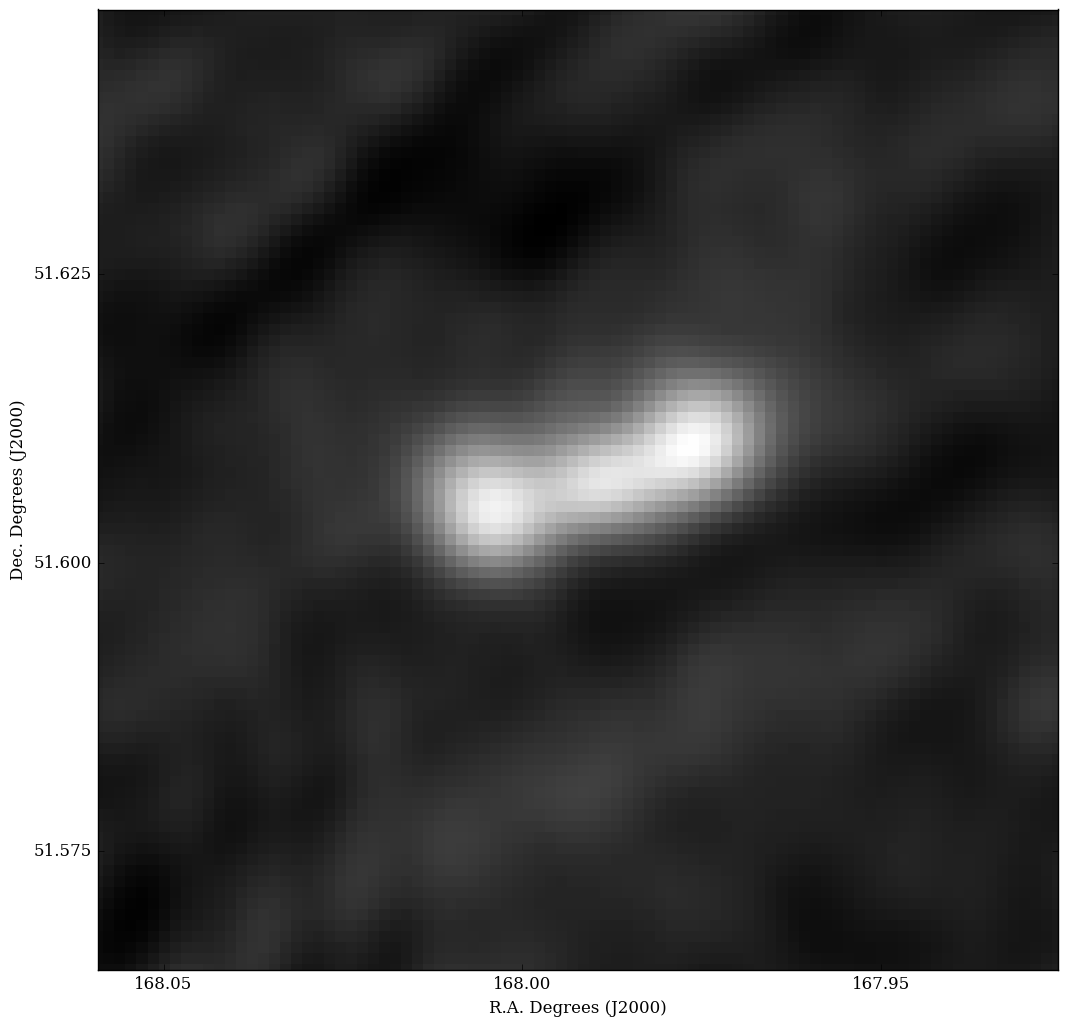

In [9]:
fig = plt.figure(figsize=(12, 12))

f = astPlots.ImagePlot(data_lofar , wcs_lofar, cutLevels = [data_lofar.min(), data_lofar.max()], axesLabels='decimal', interpolation = "none")

contour_array_nvss = astImages.generateContourOverlay(data_lofar , wcs_lofar, data_nvss, wcs_nvss, highAccuracy=True)

f.addContourOverlay(contour_array_nvss, wcs_nvss, 'xmm', levels=levels_nvss, smooth=5.0, color='cyan', width=1, highAccuracy=True)
#f.addContourOverlay(data_nvss, wcs_nvss, 'xmm', levels=levels_nvss, smooth=5.0, color='cyan', width=1, highAccuracy=True)

f.draw()